In [37]:
# %%capture

# %pip install seaborn pandas numpy

# !jupyter nbextension install jupyter_ascending --user --py && \
# jupyter nbextension enable jupyter_ascending --user --py && \
# jupyter serverextension enable jupyter_ascending --user --py

In [80]:
import seaborn as sns

font = {
    'L': 28,
    "M": 20,
    "S": 16,
}

# sns.set_style("darkgrid")
# sns.color_palette("deep")
sns.set_theme(style="darkgrid", palette="pastel")
plt.rc('axes', titlesize=font['L'])     # fontsize of the axes title
plt.rc('axes', labelsize=font['M'])    # fontsize of the x and y labels
plt.rc('xtick', labelsize=font['S'])    # fontsize of the tick labels
plt.rc('ytick', labelsize=font['L'])    # fontsize of the tick labels
plt.rc('legend', fontsize=font['L'])    # legend fontsize
plt.rc('font', size=font['L'])          # controls default text sizes

In [39]:
import sys
from os import path
sys.path.append(path.join(".."))

In [57]:
import pandas as pd
import numpy as np

from mi_scale_2.config import CHANGE_TRENDS_DAYS
from mi_scale_2.weight_util import get_saved_weights

df_ = pd.DataFrame(df).sort_values(by="dt", ascending=False).drop(columns=["unit"])
df_["weight"] = df_["weight"].astype(float)
df_["days"] = df_["dt"].rsub(pd.Timestamp('today')).dt.days
df_["weeks"] = np.floor(df_["days"] / 7).astype(int)
# df_["weeks"] = df_["dt"].rsub(pd.Timestamp('today')).dt.week
# now = pd.datetime.now().replace(hour=0, minute=0, second=0, microsecond=0)
# df_["days"] = df_["dt"].rsub(pd.Timestamp.now().floor('week'))
df_ = df_.drop(columns=["timestamp"])
# df_ = df_.groupby('days').mean()
df_["weight_delta"] = df_["weight"].rsub(df_["weight"].iloc[0])
# df_["gain"] = df_["weight"] < df_["weight"].iloc[0] #"Gain" if df_["weight"] < df_["weight"].iloc[0] else "Loss"
df_["trend"] = df_["weight_delta"].apply(lambda delta: "Gain" if delta > 0 else "Loss")
# df_["trend"].loc[df_["weight_delta", "trend"] > 0] = "Gain"
# df_["trend"].loc[df_["weight_delta", "trend"] < 0] = "Loss"
# df_["trend"].loc[df_["weight_delta", "trend"] == 0] = "No change"
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
#     print(df_) #.drop_duplicates("days", keep="last"))
    pass

<Axes: xlabel='Days since today', ylabel='Weight (kg)'>

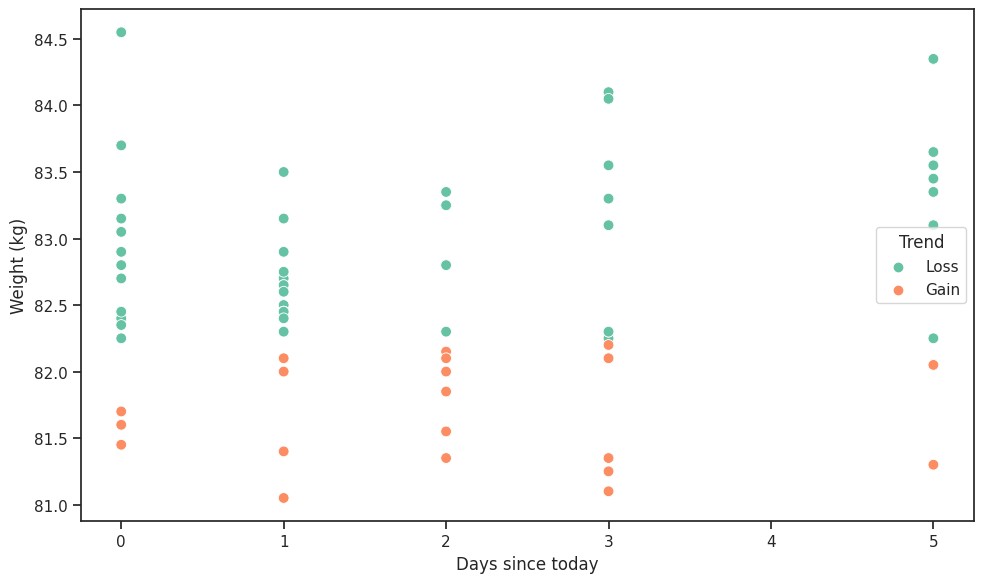

In [51]:
plt.figure(figsize=(10,6), tight_layout=True)

ax = sns.scatterplot(data=df_, x="weeks", y="weight", hue="trend", palette="Set2", s=60)
ax.set(xlabel="Days since today", ylabel="Weight (kg)")
# ax.legend([True, False], ["Gain", "Loss"], title='Gain/loss', title_fontsize = 12) 
ax.legend(title='Trend', title_fontsize = 12) 
ax

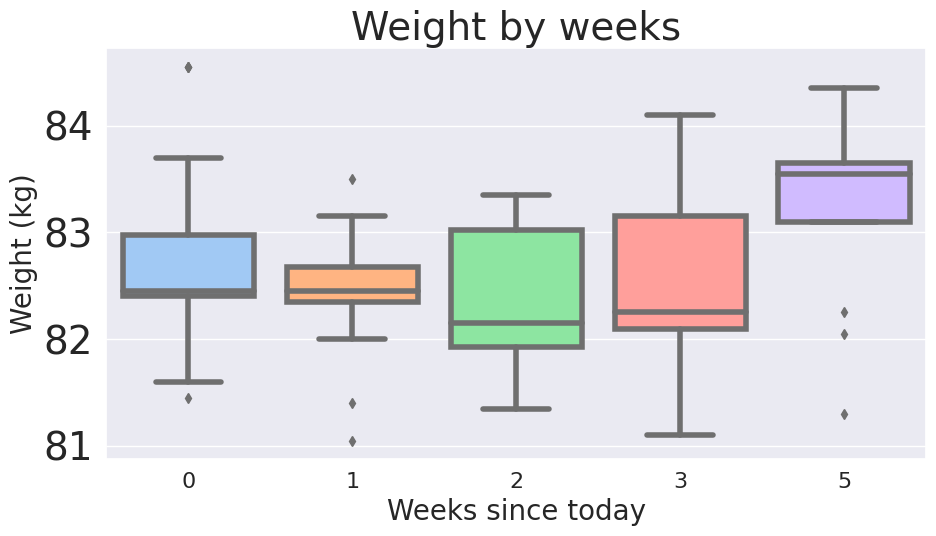

In [81]:
plt.figure(figsize=(10,6), tight_layout=True)
ax = sns.boxplot(data=df_, x='weeks', y='weight', linewidth=4, saturation=1)
ax.set(title='Weight by weeks', xlabel='Weeks since today', ylabel='Weight (kg)')
plt.show()

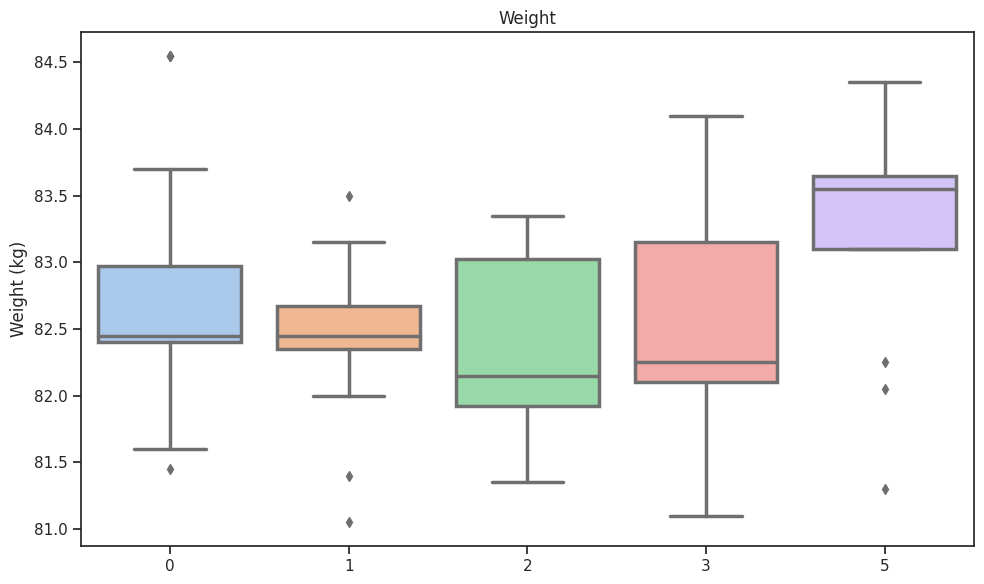

In [60]:
plt.figure(figsize=(10,6), tight_layout=True)
ax = sns.boxplot(data=df_, x='weeks', y='weight', linewidth=2.5)
ax.set(title='Weight', xlabel='', ylabel='Weight (kg)')
plt.show()

In [43]:
df_d = pd.DataFrame(columns=CHANGE_TRENDS_DAYS)
def assign_day(day_since):
    if day_since <= CHANGE_TRENDS_DAYS[0]:
        return CHANGE_TRENDS_DAYS[0]
    if day_since >= CHANGE_TRENDS_DAYS[-1]:
        return CHANGE_TRENDS_DAYS[-1]
    for i in range(len(CHANGE_TRENDS_DAYS)):
        if i < 1:
            continue
        day = CHANGE_TRENDS_DAYS[i]
        prev_day = CHANGE_TRENDS_DAYS[i-1]
        if day_since > prev_day and day_since <= day:
            return day
#         if day_since < day && 
df_["trend_day"] = df_["days"].apply(assign_day).astype(int)
df_.T

,89,88,87,86,85,84,83,82,81,80,...,9,8,7,6,5,4,3,2,1,0
weight,82.25,81.7,82.7,81.6,82.45,82.45,83.7,82.4,83.15,83.05,...,83.65,83.45,83.55,84.35,84.35,84.35,83.1,83.55,83.65,83.35
dt,2023-07-20 23:07:53.108000,2023-07-20 06:47:58.036000,2023-07-20 00:29:37.522000,2023-07-19 08:21:18.040000,2023-07-18 14:01:28.321000,2023-07-18 13:58:56.646000,2023-07-18 13:57:57.024000,2023-07-18 13:57:20.874000,2023-07-18 13:55:19.407000,2023-07-18 13:54:31.859000,...,2023-06-17 19:25:22.257000,2023-06-17 19:25:01.944000,2023-06-17 19:24:21.491000,2023-06-17 17:31:13.680000,2023-06-17 16:29:17.934000,2023-06-17 16:28:44.771000,2023-06-17 16:27:05.266000,2023-06-17 16:26:43.069000,2023-06-17 16:26:32.038000,2023-06-17 16:26:09.985000
days,1,2,2,3,4,4,4,4,4,4,...,34,34,34,34,34,34,34,34,34,34
weight_delta,0.0,0.55,-0.45,0.65,-0.2,-0.2,-1.45,-0.15,-0.9,-0.8,...,-1.4,-1.2,-1.3,-2.1,-2.1,-2.1,-0.85,-1.3,-1.4,-1.1
trend,Loss,Gain,Loss,Gain,Loss,Loss,Loss,Loss,Loss,Loss,...,Loss,Loss,Loss,Loss,Loss,Loss,Loss,Loss,Loss,Loss
trend_day,7,7,7,7,7,7,7,7,7,7,...,90,90,90,90,90,90,90,90,90,90


/tmp/ipykernel_31058/3493449308.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax = sns.lineplot(data=df_, x='days', y='weight', palette='Set2', linewidth=2.5)


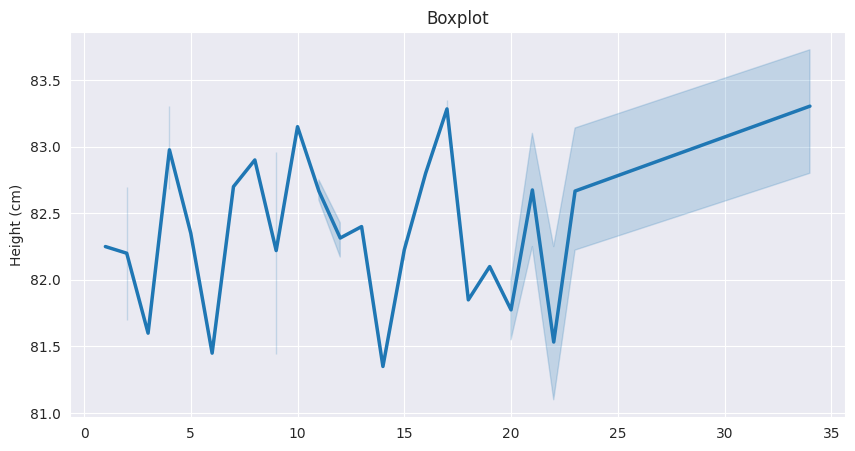

In [44]:
plt.figure(figsize=(10,5))
ax = sns.lineplot(data=df_, x='days', y='weight', palette='Set2', linewidth=2.5)
ax.set(title='Boxplot', xlabel='', ylabel='Height (cm)')
plt.show()

In [95]:
from mi_scale_2.weight_util import get_saved_weights

weights = get_saved_weights()
weights = list({weight["timestamp"].date(): weight for weight in weights}.values())
# weights

weights[0]['timestamp'].date()
weights

[{'weight': 81.3,
  'unit': 'kg',
  'timestamp': datetime.datetime(2023, 6, 17, 20, 2, 57, 950377)},
 {'weight': 84.1,
  'unit': 'kg',
  'timestamp': datetime.datetime(2023, 6, 28, 19, 26, 26, 679722)},
 {'weight': 81.35,
  'unit': 'kg',
  'timestamp': datetime.datetime(2023, 6, 29, 9, 55, 57, 635532)},
 {'weight': 81.1,
  'unit': 'kg',
  'timestamp': datetime.datetime(2023, 6, 30, 10, 57, 39, 178032)},
 {'weight': 82.25,
  'unit': 'kg',
  'timestamp': datetime.datetime(2023, 7, 1, 8, 17, 42, 533566)},
 {'weight': 81.55,
  'unit': 'kg',
  'timestamp': datetime.datetime(2023, 7, 2, 14, 13, 41, 124465)},
 {'weight': 82.1,
  'unit': 'kg',
  'timestamp': datetime.datetime(2023, 7, 3, 15, 19, 19, 159944)},
 {'weight': 81.85,
  'unit': 'kg',
  'timestamp': datetime.datetime(2023, 7, 4, 12, 45, 2, 311238)},
 {'weight': 83.25,
  'unit': 'kg',
  'timestamp': datetime.datetime(2023, 7, 5, 12, 16, 30, 308073)},
 {'weight': 82.8,
  'unit': 'kg',
  'timestamp': datetime.datetime(2023, 7, 6, 11, 42,